In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

algo = "HC"
base_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/"
pictures_path = f"{base_path}Pictures/"
dataset_path = f"{base_path}Survey+dataset/"
code_path = f"{base_path}Code/"
results_path = f"{base_path}Code/Data/"
HC_base_path = f"{results_path}{algo}/"

import sys
sys.path.append(code_path)
np.set_printoptions(precision=5, suppress=True)

Check Sizes

In [3]:
from scipy.cluster.hierarchy import fcluster

In [4]:
algo = "HC"
metric="VDM"
vars = 5
link = 'single'
link_file_type = ".npy"

base_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/"
pictures_path = f"{base_path}Pictures/"
dataset_path = f"{base_path}Survey+dataset/"
results_path = f"{base_path}Code/Data/"
HC_base_path = f"{results_path}{algo}/"

link_path = f"{HC_base_path}{metric}{vars}/HC_{metric}_{link}{link_file_type}"
Z = {}
Z[metric] = np.load(link_path)


In [5]:
n_clusters = 300
unique, counts = np.unique(fcluster(Z[metric], n_clusters, criterion='maxclust'), return_counts=True)
np.max(counts)

4141

## Plot elbow

In [13]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent
from scipy.spatial.distance import cdist, pdist
from plots.knee_elbow import PlotElbow

def vdm_prepare_df(df, cat_ix):
  replace_arr = {}
  for col in df.columns[~cat_ix]:
    replace_arr[col] = { value: key for key, value in enumerate(np.sort(df[col].unique()))}
  return df.replace(replace_arr)

# ------- config vars ---------
algo = "HC"
metric="VDM"
link_file_type = ".npy"
wss_file_type = "2.npy"
vars_list = [5]
range_min = 2
range_max = 600
postprocessing = False
is_postprocessing = "_fix" if postprocessing else ""

base_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/"
pictures_path = f"{base_path}Pictures/"
dataset_path = f"{base_path}Survey+dataset/"
results_path = f"{base_path}Code/Data/"
HC_base_path = f"{results_path}{algo}/"

# ------- compute wss/bss --------
linkages = ["single"]#, "complete", "average", "weighted"]#, "ward", "centroid", "median"]

for vars in vars_list:
  print(f"vars: {vars}")

  for link in linkages:
    
    WSS_path = f"{HC_base_path}{metric}{vars}/WSS/WSS_{metric}_{link}_range({range_min},{range_max}){is_postprocessing}{wss_file_type}"
    wss = np.load(WSS_path)
    print(wss)
    # Warning: Run this part in a normal cell of colab
    save_path = f"{pictures_path}{algo}/Knee_Elbow/{metric}{vars}/"
    ke_file_type = "2.html"
    save_path += f"Elbow_{metric}_{link}_range({range_min},{range_max}){is_postprocessing}{ke_file_type}"
    PlotElbow(wss,range(range_min, range_max), metric +' Distance'+' (' + link + ')', save_path)
    print(link, "done")


vars: 5
[65.71207 65.71207 59.00062 59.00062 54.64493 54.60452 54.59618 54.57648
 54.54397 54.54397 54.54397 54.54397 51.66145 51.66145 51.66145 51.66145
 51.66145 48.52815 48.4171  48.39684 48.39684 48.39684 46.43914 46.43914
 46.43914 44.33241 41.98585 41.98585 41.98585 41.98585 41.98585 32.06618
 32.04863 32.04863 32.04863 32.04863 32.04863 32.04863 32.04863 32.04863
 32.04863 32.04863 32.04863 32.04863 32.04863 32.04863 32.04863 24.04794
 24.00524 24.00524 23.9645  23.96224 23.91178 23.90354 23.90354 23.90354
 23.90354 23.90354 23.90354 23.32681 23.32681 23.2202  23.21849 23.16564
 23.16564 23.08485 22.95431 22.95431 22.95287 22.94209 22.94209 22.92989
 22.91938 22.91938 22.91409 22.91409 22.91409 22.91409 22.73735 22.73585
 22.73585 22.6629  22.61425 22.61425 19.64344 19.64344 19.64344 19.64344
 19.64344 19.64344 19.64344 19.64344 19.64344 19.64344 19.64344 19.64344
 19.64344 19.64344 19.64344 19.64344 19.64344 19.64344 19.64344 19.64344
 19.64344 19.64344 19.64344 15.25708 15.257

single done


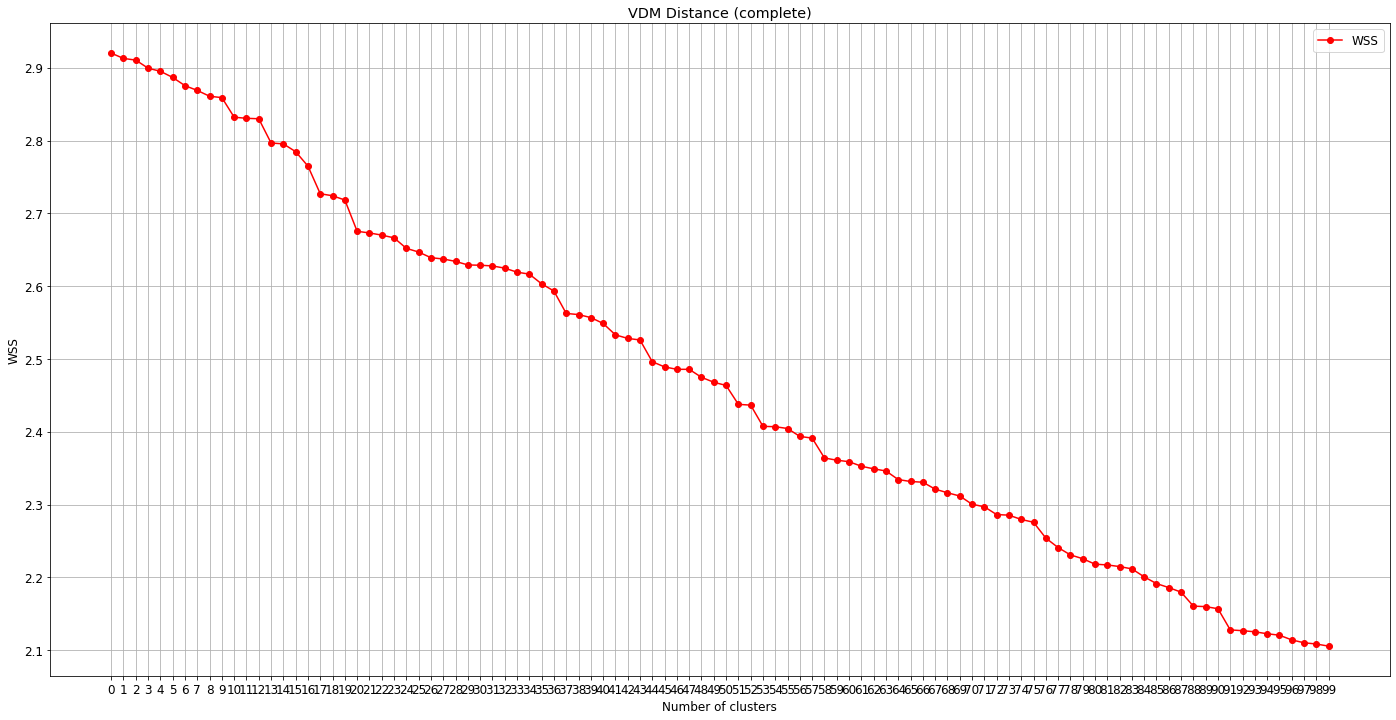

In [ ]:
vars = 6
link = "complete"
range_min = 200
range_max = 300
WSS_path = f"{HC_base_path}{metric}{vars}/WSS/WSS_{metric}_{link}_range({range_min},{range_max}){is_postprocessing}{wss_file_type}"
wss = np.load(WSS_path)

PlotElbow(wss,range(wss.shape[0]), metric +' Distance'+' (' + link + ')', save_path="")

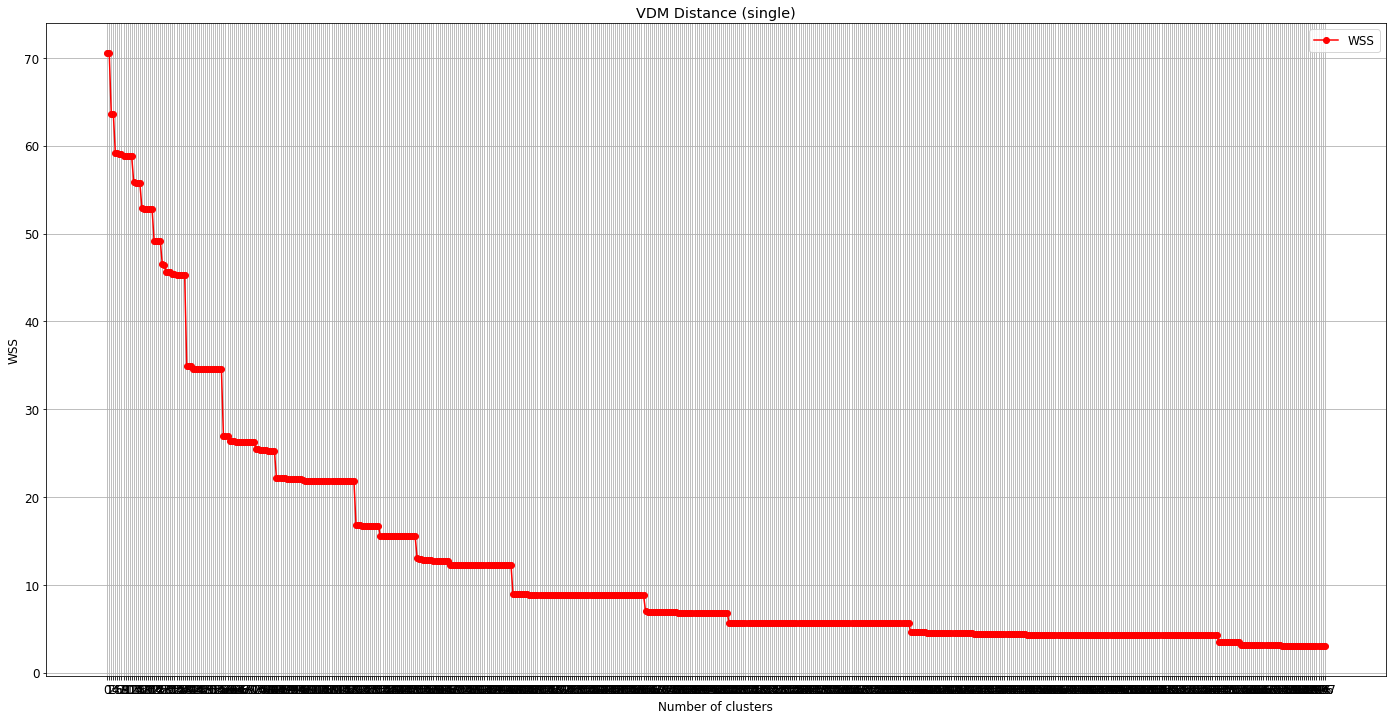

In [ ]:
vars = 6
link = "single"
range_mins = [2,100,200,300,400]
range_maxs = [100,200,300,400,600]
wss = np.array([])
for min, max in list(zip(range_mins, range_maxs)):
  WSS_path = f"{HC_base_path}{metric}{vars}/WSS/WSS_{metric}_{link}_range({min},{max}){is_postprocessing}{wss_file_type}"
  wss_tmp = np.load(WSS_path)
  wss = np.append(wss, wss_tmp)

PlotElbow(wss,range(wss.shape[0]), metric +' Distance'+' (' + link + ')', save_path="")

WSS_path = f"{HC_base_path}{metric}{vars}/WSS/WSS_{metric}_{link}_range({range_mins[0]},{range_maxs[-1]}){is_postprocessing}{wss_file_type}"
np.save(WSS_path, wss)

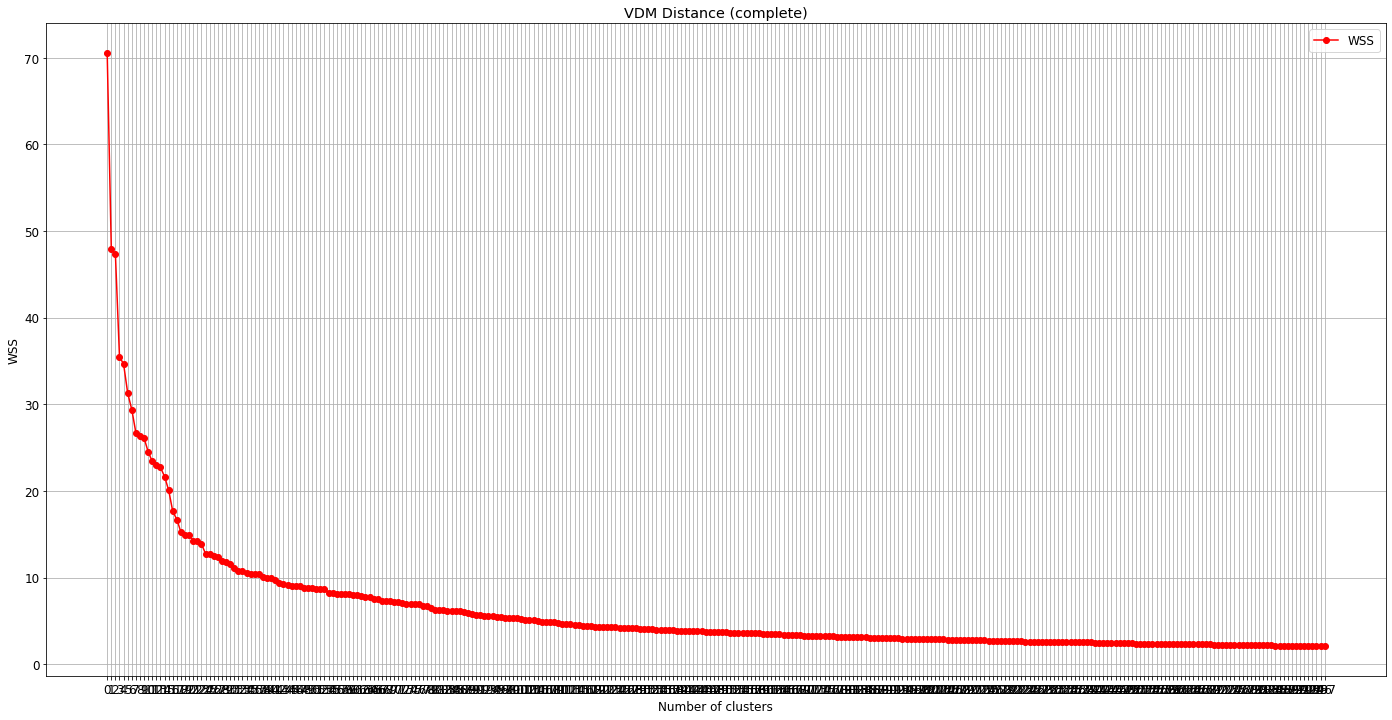

In [ ]:
vars = 6
link = "complete"
range_mins = [2,100,200]
range_maxs = [100,200,300]
wss = np.array([])
for min, max in list(zip(range_mins, range_maxs)):
  WSS_path = f"{HC_base_path}{metric}{vars}/WSS/WSS_{metric}_{link}_range({min},{max}){is_postprocessing}{wss_file_type}"
  wss_tmp = np.load(WSS_path)
  wss = np.append(wss, wss_tmp)

PlotElbow(wss,range(wss.shape[0]), metric +' Distance'+' (' + link + ')', save_path="")